In [1]:
from pathlib import Path
import pickle
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.transforms import blended_transform_factory
from matplotlib.collections import LineCollection
import seaborn as sns

import trompy as tp
import csv


colors_restricted = "#219C90"
colors_adlib_light = "#9C89B8" 
colors_adlib_dark = "#0059b3"
colors_sucralose = "#af9991"

In [2]:
DATAFOLDER = Path("C:/Data/hislight_pickles/")
FIGSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/figures")
STATSFOLDER = Path("C:/Users/kvo019/OneDrive - UiT Office 365/Pipette 2/People/Linnea/Manuscripts/hislight paper/stats")

with open(DATAFOLDER / "restricted_dark.pickle", 'rb') as handle:
    PVH_restricted_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_dark.pickle", 'rb') as handle:
    PVH_adlib_dark = pickle.load(handle)

with open(DATAFOLDER / "adlib_light.pickle", 'rb') as handle:
    PVH_adlib_light = pickle.load(handle)

with open(DATAFOLDER / "adlib_sucralose.pickle", 'rb') as handle:
    PVH_adlib_sucralose = pickle.load(handle)
    
with open(DATAFOLDER / "HL3_restricted_dark.pickle", 'rb') as handle:
    VMH_restricted_dark = pickle.load(handle)

with open(DATAFOLDER / "HL3_adlib_dark.pickle", 'rb') as handle:
    VMH_adlib_dark = pickle.load(handle)

with open(DATAFOLDER / "HL3_adlib_light.pickle", 'rb') as handle:
    VMH_adlib_light = pickle.load(handle)

with open(DATAFOLDER / "HL3_adlib_sucralose.pickle", 'rb') as handle:
    VMH_adlib_sucralose = pickle.load(handle)

In [3]:
def get_list_of_mice(data):

    mice_to_exclude = ["HL313", "HL314", "HL315", "HL316", "HL317", "HL318", "HL306", "HL308",
                        "HL202", "HL205", "HL206", "HL211",
                        "HL301", "HL304", "HL305"]
    
    #"HL202", "HL205", "HL206", "HL211" have poor placements without virus in PVH
    #HL 306, 308 have no virus
    #HL301, HL304, HL305 have poor fiber placement
    #HL313 - HL318 are control mice
    
    list_of_mice = []

    for key, val in data.items():
        if val["mouse_ID"] not in list_of_mice and val["mouse_ID"] not in mice_to_exclude:
            list_of_mice.append(val["mouse_ID"])
            
    return list_of_mice

In [4]:
PVH_mice = get_list_of_mice(PVH_restricted_dark)
VMH_mice = get_list_of_mice(VMH_restricted_dark)

all_mice= PVH_mice +VMH_mice

In [6]:
def get_lick_data (data, mice):
    
    licks = [] #empty list where data from all mice will be stored
    burst_number = []
    burst_size = []
    burst_size_first_3 = []
    
    for mouse in mice:
        temp_total = []
        temp_lick = []
        temp_burstnum = []
        temp_burstsize = []
        temp_burstsize_first_3 = []
        
        for key, val in data.items():
            if val["mouse_ID"] == mouse:
                if len(val["licks"]) < 3:
                    continue
                onset= val["licks"]
                #print(onset)
                lickdata = tp.lickCalc(onset, minburstlength=3)
                temp_total.append(lickdata["total"])
                temp_lick.append(lickdata["licks"])
                temp_burstnum.append(lickdata["bNum"])
                temp_burstsize.append(lickdata["bMean"])
                temp_burstsize_first_3.append(lickdata["bMean-first3"])

        licks.append(np.mean(temp_total))
        burst_number.append(np.mean(temp_burstnum))
        burst_size.append(np.mean(temp_burstsize))
        burst_size_first_3.append(np.mean(temp_burstsize_first_3))
        
    data_to_return= {"licks":licks, "burst number": burst_number, "burst size": burst_size, "burst size first 3": burst_size_first_3}
        
    return data_to_return

In [12]:
PVH_restricted_means= get_lick_data(PVH_restricted_dark, PVH_mice)
PVH_light_means= get_lick_data(PVH_adlib_light, PVH_mice)
PVH_dark_means= get_lick_data(PVH_adlib_dark, PVH_mice)
PVH_sucralose_means= get_lick_data(PVH_adlib_sucralose, PVH_mice)

VMH_restricted_means= get_lick_data(VMH_restricted_dark, VMH_mice)
VMH_light_means= get_lick_data(VMH_adlib_light, VMH_mice)
VMH_dark_means= get_lick_data(VMH_adlib_dark, VMH_mice)
VMH_sucralose_means= get_lick_data(VMH_adlib_sucralose, VMH_mice)

In [14]:
restricted_burst_number = np.array(PVH_restricted_means["burst number"] + VMH_restricted_means["burst number"])

In [20]:
restricted_burst_number = PVH_restricted_means["burst number"] + VMH_restricted_means["burst number"]
restricted_burst_size = PVH_restricted_means["burst size"] + VMH_restricted_means["burst size"]

light_burst_number = PVH_light_means["burst number"] + VMH_light_means["burst number"]
light_burst_size = PVH_light_means["burst size"] + VMH_light_means["burst size"]

dark_burst_number = PVH_dark_means["burst number"] + VMH_dark_means["burst number"]
dark_burst_size = PVH_dark_means["burst size"] + VMH_dark_means["burst size"]

sucralose_burst_number = PVH_sucralose_means["burst number"] + VMH_sucralose_means["burst number"]
sucralose_burst_size = PVH_sucralose_means["burst size"] + VMH_sucralose_means["burst size"]

In [ ]:
colors_restricted = "#219C90"
colors_adlib_light = "#9C89B8" 
colors_adlib_dark = "#0059b3"
colors_sucralose = "#af9991"

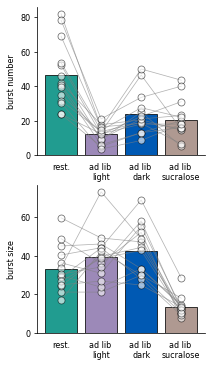

In [23]:
f,ax=plt.subplots(figsize=(3, 6), nrows=2, gridspec_kw={"hspace": 0.2})


tp.barscatter([restricted_burst_number, light_burst_number, 
              dark_burst_number, sucralose_burst_number],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose],
              scattersize=70,
              grouplabel= ["rest.","ad lib \nlight", "ad lib \ndark", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax[0])

tp.barscatter([restricted_burst_size, light_burst_size, 
              dark_burst_size, sucralose_burst_size],
              paired=True,
              barfacecolor_option='individual',
              barfacecolor=[colors_restricted, colors_adlib_light, colors_adlib_dark, colors_sucralose],
              scattersize=70,
              grouplabel= ["rest.","ad lib \nlight", "ad lib \ndark", "ad lib \nsucralose"],
              scatteralpha=0.6,
              fontsize=8,
              ax=ax[1])

ax[0].set_ylabel("burst number", fontsize = 8)
ax[1].set_ylabel("burst size", fontsize = 8)

for tick in ax[0].yaxis.get_majorticklabels():
    tick.set_fontsize(8) 
for tick in ax[1].yaxis.get_majorticklabels():
    tick.set_fontsize(8) 